### **1. Project Overview**

This project focuses on conducting an in-depth analysis of the movie industry to generate actionable insights for stakeholders. The goal is to uncover trends in financial performance, audience reception, and market dynamics, helping decision-makers drive growth and maintain competitiveness.

The analysis uses data from multiple reliable sources, including:

- **Box Office Mojo** – provides detailed box office revenue data for assessing a film’s financial success.  
- **IMDB** – offers extensive information on movies and TV shows, including cast, crew, ratings, and reviews.  
- **Rotten Tomatoes** – aggregates critic and audience reviews to evaluate public and critical reception.  
- **TheMovieDB (TMDB)** – a user-driven database containing movie details, ratings, and community reviews.  
- **TheNumbers** – delivers in-depth box office statistics, budgets, and industry-level financial insights.  

Together, these sources enable a comprehensive evaluation of movie industry performance and trends.


### ****2. Undersatnding the bussiness problem****

  ## Defining th the question

  Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

##### **Problem Statement/Objective :** *Determine which types of films are currently doing the best at the box office and translate the findings into actionable insights.*

**Objectives:**
1. Identify types of films that are performing the best.
2. Explore and analyze current box office trends.
3. Identify factors that  contribute to the success of a movie.
4. Translate findings into actionable insights.

To address our objectives, we need to answer the following research questions:
1. What are the **top performing genres?**
2. What are the **preferences of the target audience?**
3. What can be done to **break market barriers?**


# 3. Data Understanding
For the analysis,we used data from the `zippedData` folder of [this repository.](https://github.com/learn-co-curriculum/dsc-phase-2-project-v3)

### Dataset Descriptions

1. **bom.movie_gross.csv**
   - **Description:** Contains financial information about movies.
   - **Columns:**
     - **Title:** The title of the film.
     - **Year of Production:** The year the movie was produced.
     - **Domestic Gross:** Total revenue generated within the domestic market.
     - **Foreign Gross:** Total revenue generated in the global market.
     - **studio** The company that produced the movie

2. **tmdb.movies.csv**
   - **Description:** Information about movies from The Movie Database (TMDb).
   - **Columns:**
     - **Genres_ids:** Identifiers for movie genres.
     - **Language:** The language in which the movie is made.
     - **Title:** The title of the movie.
     - **Popularity:** Popularity score of the movie.
     - **Average Vote Count:** Average number of votes the movie has received.

3. **rt.reviews.tsv**
   - **Description:** Contains movie reviews and ratings.
   - **Columns:**
     - **Rating:** Rating of the movie on a scale of 1-5.
     - **Publisher:** The entity that published the review.
     - **Date:** The date the review was published.

4. **rt.movie_info.tsv**
   - **Description:** Details about various movies.
   - **Columns:**
     - **Synopsis:** A brief summary of the movie’s plot.
     - **Rating:** Rating of the movie (e.g., Rotten Tomatoes score).
     - **Release Date:** The date when the movie was first shown in theaters.
     - **Box Office:** Financial data related to the movie’s box office performance.
   

5. **tn.movie_budgets.csv**
   - **Description:** Contains financial details about movies.
   - **Columns:**
     - **Budget:** The production budget of the movie.
     - **Domestic Gross:** Revenue generated in the domestic market.
     - **Worldwide Gross:** Total revenue generated worldwide.
     

6. **im.db**
- **Description:** im.db is a database that contains the tables listed below.

- **Tables:**
  - **movie_basics**
    - **Columns:**
      - **movie_id:** Unique identifier for each movie.
      - **primary_title:** The primary title of the movie.
      - **original_title:** The original title of the movie.
      - **start_year:** The year the movie was released.
      - **runtime_minutes:** The runtime of the movie in minutes.
      - **genres:** Genres associated with the movie.


  - **movie_ratings**
    - **Columns:**
      - **movie_id:** Unique identifier for the movie.
      - **averagerating:** Average rating of the movie.
      - **numvotes:** Number of votes the movie received.




**Properties of Variables of interest:**

1. ***Movie Name:*** Categorical variable which is a textual label or name of the movie.
2. ***Genre:*** Categorical variable representing the type or category of the movie (e.g., Action, Drama, Comedy).
3. ***Budget:*** Continuous variable representing the production cost or budget of the movie.
4. ***Worldwide Gross:*** Continuous variable representing the total revenue generated by the movie at the box office.
5. ***User Rating:*** Continuous variable representing the average ratings or scores given by users for the movie.
6. ***Release Date:*** Temporal variable indicating the date when the movie was released in theaters.




# 4. Data Preparation 

In [2]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import sqlite3
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 4.1 Reading the Data

In [3]:
#reading the budgets dataset
tn_movie_budgets = pd.read_csv("../Data/tn.movie_budgets.csv", low_memory=False)
tn_movie_budgets .head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
conn = sqlite3.connect("../Data/im.db",False)
table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table' ;"""
pd.read_sql(table_name_query, conn)


,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [5]:
# read the movie_basics dataset
movie_basics = pd.read_sql("""SELECT * FROM movie_basics """, conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
# read movie_ratings
movie_ratings = pd.read_sql("""SELECT * FROM movie_ratings """, conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [7]:
#reading the rt.reviews dataset
rt_reviews = pd.read_csv("../Data/rt.reviews.tsv", sep='\t', encoding ='latin-1', low_memory=False)
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [8]:
#reading the rt.movies_info dataset
rt_movies_info = pd.read_csv("../Data/rt.movie_info.tsv", sep='\t', encoding ='latin-1', low_memory=False)
rt_movies_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


## 4.2 Data Exploration

   ###  Exploring the tn_movie_budget dataset

In [9]:
#this prints the overview information of the dataset
tn_movie_budgets.info()
#this prints the number of rows and columns in the dataset
print("The shape of our dataset is", tn_movie_budgets.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
The shape of our dataset is (5782, 6)


In [10]:
# Descriptive Analysis on Numeric features
tn_movie_budgets.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [11]:
#checking for duplicates
print("Number of duplicates is ", tn_movie_budgets.duplicated().sum())


Number of duplicates is  0


In [12]:
#checking for missing values
print("Missing values in the dataset")

print(tn_movie_budgets.isna().sum())

Missing values in the dataset
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


## Exploring the rt_reviews dataset

In [13]:
#This gives the overview  information of the dataset
rt_reviews.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [14]:
#This gives the numbers of rows and columns in the dataset
print("The shape of our dataset is", rt_reviews.shape)


The shape of our dataset is (54432, 8)


In [15]:
#checking for duplicates
print("The number of duplicates in the data", rt_reviews.duplicated().sum())


The number of duplicates in the data 9


In [16]:
#checking for missing values
print( "Missing values in the dataset are as below:")
print(rt_reviews.isna().sum())

Missing values in the dataset are as below:
id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64


## Exploring the im.db database

We will focus on the `movie_ratings` and `movie_basics` tables. To make use of all available information together, we will merge the two tables togethert first

In [17]:
# data exploration.
movie_basics_and_rating = pd.merge(movie_basics, movie_ratings, on='movie_id')
movie_basics_and_rating.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [18]:
# get preview of info
movie_basics_and_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [19]:
# check for missing values
movie_basics_and_rating.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [20]:
# summary stats
movie_basics_and_rating.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


# 5. Data Cleaning

### **5.1 Cleaning the `tn_movie_budgets` Dataset**

During the initial data exploration, it was observed that the dataset contained no missing values.  
However, several columns required datatype corrections:

- `production_budget`, `domestic_gross`, and `worldwide_gross` were stored as objects and were converted to **float** for numerical analysis.  
- `release_date` was stored as an object and was converted to **datetime** for time-based analysis.  

Since the project involves examining trends over time, additional features such as **year** and **month** were extracted from the `release_date` column to support temporal analysis.


In [21]:
# converting the columns to appropriate datatypes
tn_movie_budgets["production_budget"] = tn_movie_budgets["production_budget"].replace("[$,]", "", regex=True).astype(float)
tn_movie_budgets["worldwide_gross"] = tn_movie_budgets["worldwide_gross"].replace("[$,]", "", regex=True).astype(float)
tn_movie_budgets["domestic_gross"] = tn_movie_budgets["domestic_gross"].replace("[$,]", "", regex=True).astype(float)
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [22]:
# convert `release_date` to datetime
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])

In [23]:
# Generate a `profit` column to determine net earnings by subtracting production costs from total revenues.

tn_movie_budgets['profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']

In [24]:
# to analyze trends of time, we use the datetime column `release_date`
# To make this easier, we extract year and month from our datetime column
tn_movie_budgets['year'] = tn_movie_budgets['release_date'].dt.year
tn_movie_budgets['month'] = tn_movie_budgets['release_date'].dt.month

tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year,month
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,2009,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,2011,5
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,2019,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,2015,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,2017,12


### 5.2 Cleaning the rt_review dataset

We found 9 duplicate rows in the dataset and 13,517 missing values in the `rating` column. Since ratings are important for our analysis and can’t be accurately guessed, we chose to remove both the duplicates and the missing entries.

In [25]:
# Drop duplicates based on 'rating' column
rt_reviews = rt_reviews.drop_duplicates(subset=['rating'])

In [26]:
# droping missing values in rating columns
# some non-numeric values in the rating column that cannot be converted to float, such as ‘C’. To handle this, you can filter out these invalid values before applying the conversion function.
def is_valid_rating(rating):
    try:
        float(rating)
        return True
    except ValueError:
        if '/' in rating:
            num, denom = rating.split('/')
            try:
                float(num) / float(denom)
                return True
            except ValueError:
                return False
        return False

rt_reviews = rt_reviews[rt_reviews['rating'].apply(is_valid_rating)]
#convert all to string
rt_reviews['rating'] = rt_reviews['rating'].astype(str)
#define the conversion function
def convert_rating(rating):
    if '/' in rating:
        num, denom = rating.split('/')
        return float(num) / float(denom) * 10  # Assuming ratings are out of 10
    return float(rating)
rt_reviews['rating'] = rt_reviews['rating'].apply(convert_rating)
rt_reviews.dropna(subset=['rating'], inplace=True)

### 5.3 Cleaning the movie_basics_and_ratings dataset
We notice 804 missing values in the genre column
To maintain the integrity of our dataset, we decided to replaces all missing (`NaN`) values in the 'genres' column with the label 'Missing' to keep the dataset consistent and complete.


In [27]:
# Categorizing missing data in the 'genres' column as 'Missing'
movie_basics_and_rating['genres'] = movie_basics_and_rating['genres'].fillna('Missing')

### 5.4 Combining `movie_basics_and_ratings` with `tn_movie_budgets` 


In [28]:
# merging the  datasets
combined_data_with_budget = pd.merge(movie_basics_and_rating, tn_movie_budgets, how="inner", left_on="primary_title", right_on="movie")
combined_data_with_budget.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year,month
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,Foodfight!,45000000.0,0.0,73706.0,-44926294.0,2012,12
1,tt0326592,The Overnight,The Overnight,2010,88.0,Missing,7.5,24,21,2015-06-19,The Overnight,200000.0,1109808.0,1165996.0,965996.0,2015,6
2,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,21,2015-06-19,The Overnight,200000.0,1109808.0,1165996.0,965996.0,2015,6
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,2013-03-22,On the Road,25000000.0,720828.0,9313302.0,-15686698.0,2013,3
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,2013-03-22,On the Road,25000000.0,720828.0,9313302.0,-15686698.0,2013,3


In [29]:
combined_data_with_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           2875 non-null   object        
 1   primary_title      2875 non-null   object        
 2   original_title     2875 non-null   object        
 3   start_year         2875 non-null   int64         
 4   runtime_minutes    2757 non-null   float64       
 5   genres             2875 non-null   object        
 6   averagerating      2875 non-null   float64       
 7   numvotes           2875 non-null   int64         
 8   id                 2875 non-null   int64         
 9   release_date       2875 non-null   datetime64[ns]
 10  movie              2875 non-null   object        
 11  production_budget  2875 non-null   float64       
 12  domestic_gross     2875 non-null   float64       
 13  worldwide_gross    2875 non-null   float64       
 14  profit  

In [30]:
# check for duplicate records. in this case, rows are considered duplicates if the values in these columns are the same.
duplicates = combined_data_with_budget[combined_data_with_budget.duplicated(subset=['release_date', 
                                                                              'movie',
                                                                              'domestic_gross',
                                                                              'production_budget',
                                                                              'worldwide_gross'])]
duplicates

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year,month
2,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,21,2015-06-19,The Overnight,200000.0,1109808.0,1165996.0,965996.0,2015,6
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,2013-03-22,On the Road,25000000.0,720828.0,9313302.0,-15686698.0,2013,3
5,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,17,2013-03-22,On the Road,25000000.0,720828.0,9313302.0,-15686698.0,2013,3
24,tt4453750,Before We Go,Before We Go,2014,84.0,"Documentary,Drama,News",7.0,22,52,2015-09-04,Before We Go,3000000.0,37151.0,483938.0,-2516062.0,2015,9
29,tt4028068,Wonder Woman,Wonder Woman,2014,60.0,Sci-Fi,4.2,20,55,2017-06-02,Wonder Woman,150000000.0,412563408.0,821133378.0,671133378.0,2017,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774,tt6305342,Nomad,Göçebe,2017,NaN,Drama,6.3,68,37,2007-03-16,Nomad,40000000.0,79123.0,79123.0,-39920877.0,2007,3
2787,tt6852284,Venus,Venus,2017,95.0,"Comedy,Drama,Family",5.9,161,62,2006-12-21,Venus,6000000.0,3347411.0,7818479.0,1818479.0,2006,12
2801,tt6644200,A Quiet Place,A Quiet Place,2018,90.0,"Drama,Horror,Sci-Fi",7.6,305031,66,2018-04-06,A Quiet Place,17000000.0,188024361.0,334522294.0,317522294.0,2018,4
2814,tt6739824,Upgrade,Upgrade,2016,NaN,Drama,8.8,69,89,2018-06-01,Upgrade,3000000.0,11977130.0,16553285.0,13553285.0,2018,6


In [31]:
# Drop duplicates and keep first occurrence
combined_data_with_budget = combined_data_with_budget.drop_duplicates(subset=['release_date', 
                                                                              'movie',
                                                                              'domestic_gross',
                                                                              'production_budget',
                                                                              'worldwide_gross'], keep='first')

# confirm duplicates have been dropped.
combined_data_with_budget.duplicated().sum()

0

In [32]:
# We noticed from data exploration that the genre col had a few missing values . So drop missing values
combined_data_with_budget.dropna(inplace= True)

In [33]:
combined_data_with_budget.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year,month
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,Foodfight!,45000000.0,0.0,73706.0,-44926294.0,2012,12
1,tt0326592,The Overnight,The Overnight,2010,88.0,Missing,7.5,24,21,2015-06-19,The Overnight,200000.0,1109808.0,1165996.0,965996.0,2015,6
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,2013-03-22,On the Road,25000000.0,720828.0,9313302.0,-15686698.0,2013,3
6,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,2013-12-25,The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0,96861183.0,2013,12
7,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,2014-09-19,A Walk Among the Tombstones,28000000.0,26017685.0,62108587.0,34108587.0,2014,9


# 6. Exploratory Data Analysis

### 6.1 What is the Distribution of genres in our dataset?

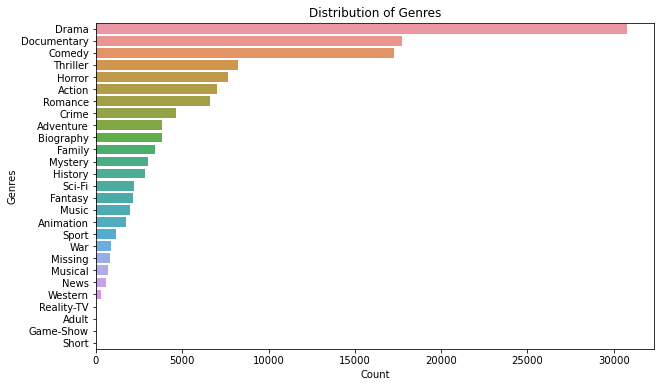

In [34]:
# Distribution of genres
plt.figure(figsize=(10, 6))
movie_basics_and_rating_exploded = movie_basics_and_rating['genres'].str.split(',').explode()
sns.countplot(y=movie_basics_and_rating_exploded, order=movie_basics_and_rating_exploded.value_counts().index)
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

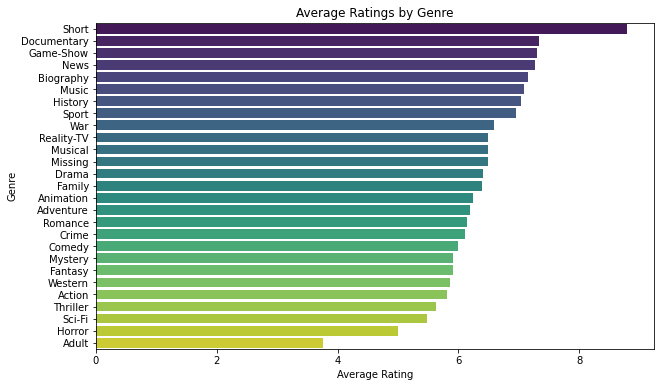

In [35]:
# Exploding genres to handle multiple genres per movie
movie_basics_and_ratings_exploded = movie_basics_and_rating.assign(genres=movie_basics_and_rating['genres'].str.split(',')).explode('genres')

# Calculating the average rating for each genre
genre_avg_rating = movie_basics_and_ratings_exploded.groupby('genres')['averagerating'].mean().reset_index().sort_values(by = 'averagerating', ascending=False)


# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='averagerating', y='genres', data=genre_avg_rating, palette='viridis')
plt.title('Average Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

Genres with the highest average ratings are short films, Documentary and Game show. Adult films have the lowest average rating score.

### 6.2 What movies have been the most successfull financially?
To answer this question, we look at the box office gross earnings and profits of various movies.

In [36]:
# check the top perfoming movies
top_20_movies_world=tn_movie_budgets.nlargest (n=20, columns='worldwide_gross')
top_20_movies_domestic = tn_movie_budgets.nlargest(n=20, columns ='domestic_gross')

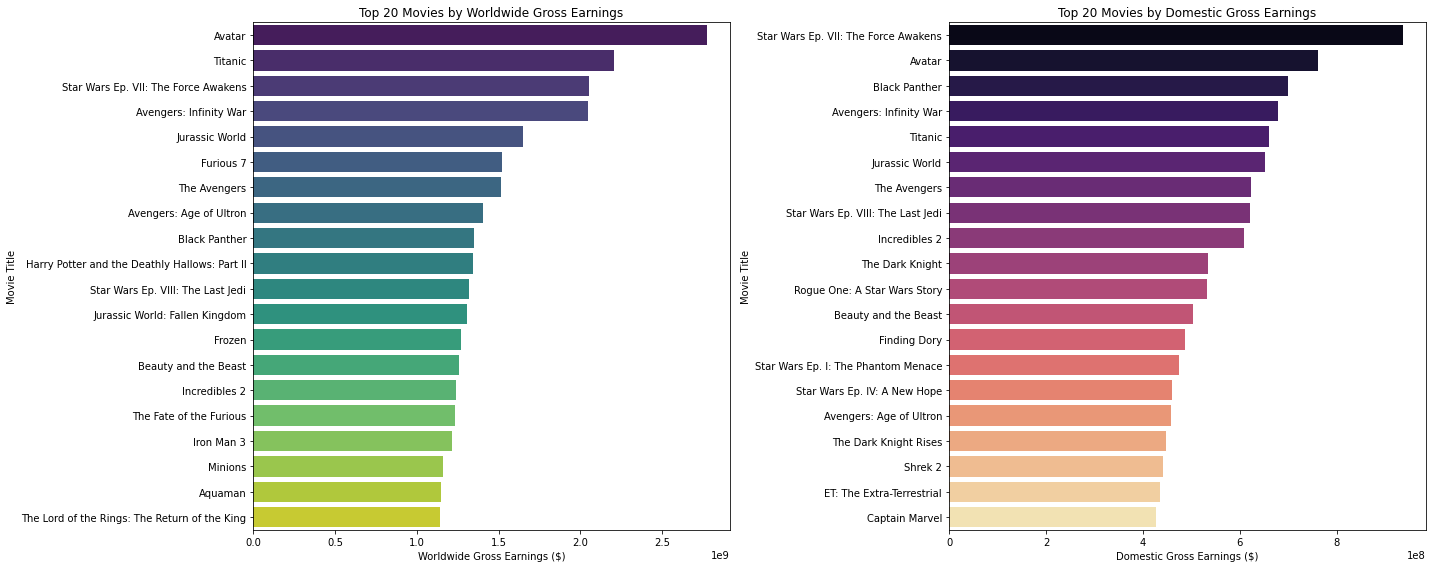

In [37]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot for worldwide gross earnings
sns.barplot(x='worldwide_gross', y='movie', data=top_20_movies_world, ax=axes[0], palette='viridis')
axes[0].set_xlabel('Worldwide Gross Earnings ($)')
axes[0].set_ylabel('Movie Title')
axes[0].set_title('Top 20 Movies by Worldwide Gross Earnings')

# Plot for domestic gross earnings
sns.barplot(x='domestic_gross', y='movie', data=top_20_movies_domestic, ax=axes[1], palette='magma')
axes[1].set_xlabel('Domestic Gross Earnings ($)')
axes[1].set_ylabel('Movie Title')
axes[1].set_title('Top 20 Movies by Domestic Gross Earnings')

# Adjust layout
plt.tight_layout()

# plt.savefig('top_20_movies_by_gross.png', dpi=300, bbox_inches='tight')

# Show the plots
plt.show()

The movie with the highest revenue at approximately $2.8 million is Avatar.

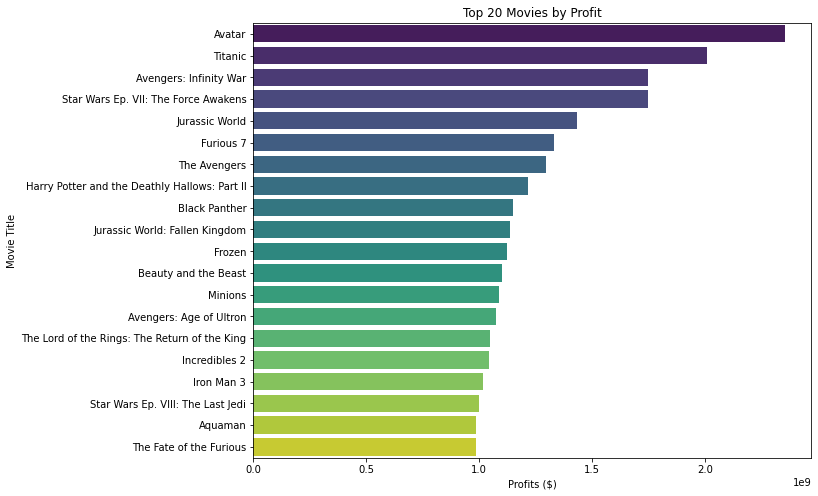

In [38]:
fig , ax = plt.subplots(figsize = (10,8))
# get the top 20 profitable movies
top_profitable = tn_movie_budgets.nlargest(n = 20, columns= 'profit')

sns.barplot(x='profit', y='movie', data=top_profitable, ax=ax, palette='viridis')

# Set axis labels and title
ax.set_xlabel('Profits ($)')
ax.set_ylabel('Movie Title')
plt.title('Top 20 Movies by Profit')

# plt.savefig('top_20_movies_by_profit.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

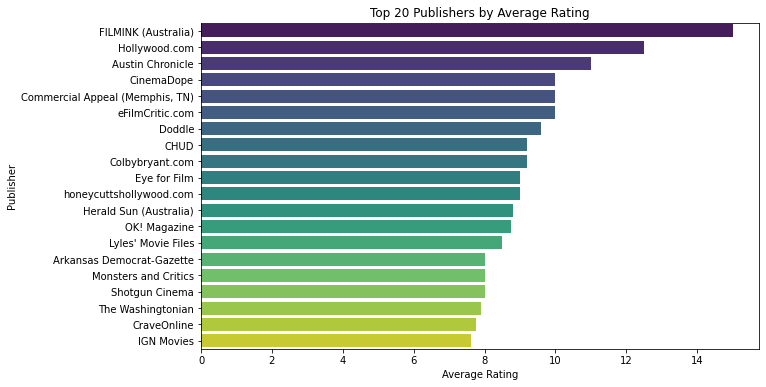

In [39]:
publisher_ratings = rt_reviews.groupby('publisher')['rating'].mean()
# Get the top 20 publishers by average rating
top_20_rating = publisher_ratings.nlargest(n=20)

# Convert the Series to a DataFrame for seaborn
top_20_df = top_20_rating.reset_index()

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='rating', y='publisher', data=top_20_df, ax=ax, palette='viridis')

# Set axis labels and title
plt.xlabel('Average Rating')
plt.ylabel('Publisher')
plt.title('Top 20 Publishers by Average Rating')
plt.show()

### 6.3 Analysing the relationship between `domestic_gross`, `worlwide_gross` and `profit`   

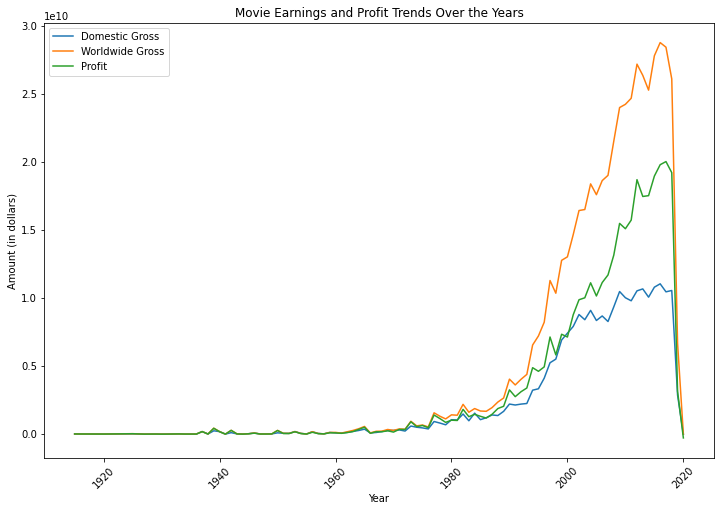

In [40]:
# plot movie earnings trends over the years and profits
# Aggregate data by year
yearly_data = tn_movie_budgets.groupby('year').agg({
    'domestic_gross': 'sum',
    'worldwide_gross': 'sum',
    'profit': 'sum'
}).reset_index()

# Plot the trends
fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(data=yearly_data, x='year', y='domestic_gross', label='Domestic Gross', ax=ax)
sns.lineplot(data=yearly_data, x='year', y='worldwide_gross', label='Worldwide Gross', ax=ax)
sns.lineplot(data=yearly_data, x='year', y='profit', label='Profit', ax=ax)

ax.set_xlabel('Year')
ax.set_ylabel('Amount (in dollars)')
ax.set_title('Movie Earnings and Profit Trends Over the Years')
plt.xticks(rotation=45)
plt.legend()

plt.show();

Over time, we notice `domestic_gross`, `worldwide_gross` and `profit` have been generally increasing. 

To further understand `worldwide_gross`by month, we plot the average and total gross revenue by month. 

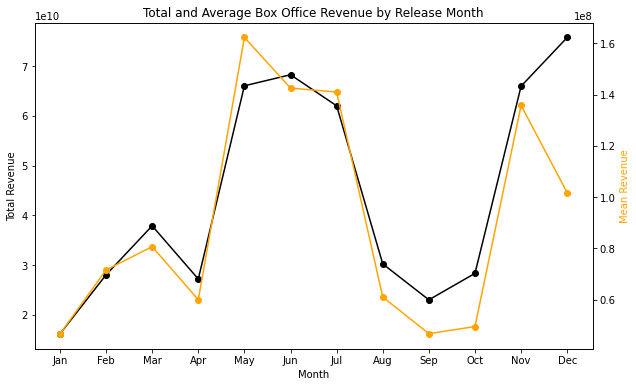

In [41]:
# Group by month and calculate total and average revenue
monthly_revenue = tn_movie_budgets.groupby('month')['worldwide_gross'].agg(['sum', 'mean']).reset_index()

# Plot the total and average revenue by month
fig, ax1 = plt.subplots(figsize=(10,6))


ax1.set_xlabel('Month')
ax1.set_ylabel('Total Revenue', color="black")
ax1.plot(monthly_revenue['month'], monthly_revenue['sum'], color="black", marker='o', label='Total Revenue')
# ax1.plot(monthly_revenue['month'], monthly_revenue['mean'], color="orange", marker='o', label='Mean Revenue')


# Creating a second y-axis for Mean Revenue
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Revenue', color="orange")
ax2.plot(monthly_revenue['month'], monthly_revenue['mean'], color="orange", marker='o', label='Mean Revenue')

plt.title('Total and Average Box Office Revenue by Release Month')
plt.xticks(monthly_revenue['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# Save the figure to a file
# plt.savefig('revenue_by_relese_month.png', dpi=300, bbox_inches='tight')
plt.show()

From the above graph, we notice that while May, November and December have the highest revenues, on average, May, June and July are the highest performing.

### How does the movie budget impact box office revenue, and can smaller budget films be profitable?

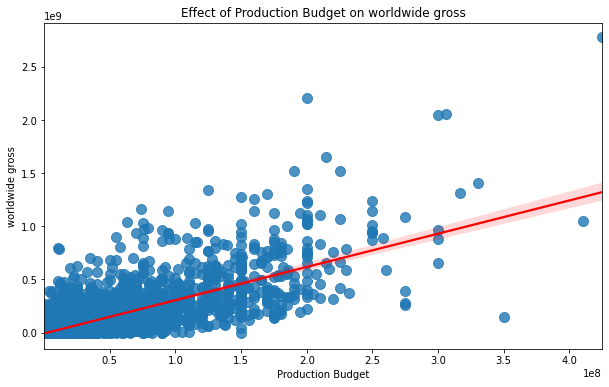

In [42]:
# How does the movie budget impact box office revenue, and can smaller budget films be profitable?
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='production_budget', y='worldwide_gross', data=tn_movie_budgets, scatter_kws={'s':100}, line_kws={'color':'red'})

# Customize the plot
plt.title('Effect of Production Budget on worldwide gross')
plt.xlabel('Production Budget')
plt.ylabel('worldwide gross')

# Show the plot
plt.show()

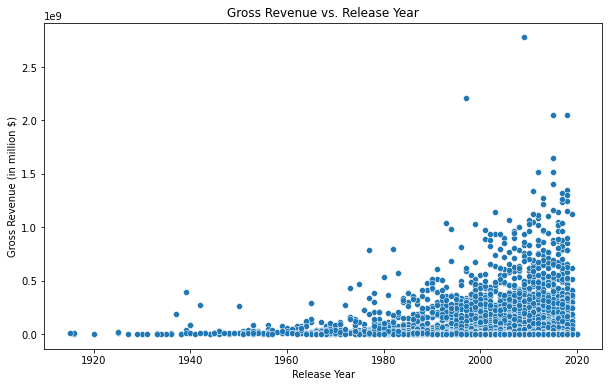

In [43]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='worldwide_gross', data=tn_movie_budgets)
plt.title('Gross Revenue vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('Gross Revenue (in million $)')
plt.show()

The plot above shows an that the gross revenue from movies has generally increased from 1920 to 2020. This suggests that movies release in later years tend to earn more revenue.